In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

dataframe = pd.read_csv("../archive/labels_train.csv")


print(dataframe.head(20))



                      frame  xmin  xmax  ymin  ymax  class_id
0   1478019952686311006.jpg   237   251   143   155         1
1   1478019952686311006.jpg   437   454   120   186         3
2   1478019953180167674.jpg   218   231   146   158         1
3   1478019953689774621.jpg   171   182   141   154         2
4   1478019953689774621.jpg   179   191   144   155         1
5   1478019953689774621.jpg   206   220   145   156         1
6   1478019953689774621.jpg   385   420   122   152         1
7   1478019953689774621.jpg   411   462   124   148         1
8   1478019954186238236.jpg   165   177   140   154         2
9   1478019954186238236.jpg   171   182   144   157         1
10  1478019954186238236.jpg   200   214   145   157         1
11  1478019954186238236.jpg   362   430   118   149         1
12  1478019954186238236.jpg   433   479   124   148         1
13  1478019954685370994.jpg   160   173   140   153         2
14  1478019954685370994.jpg   165   177   144   156         1
15  1478

In [12]:
print(dataframe.columns)

dataframe_columns = dataframe.columns.to_numpy()
print(dataframe_columns)




Index(['frame', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'], dtype='object')
['frame' 'xmin' 'xmax' 'ymin' 'ymax' 'class_id']


In [14]:
grouped_dataframe = dataframe.groupby('frame')

image_data = []

for filename, group in grouped_dataframe:
    boxes = group[['xmin', 'ymin', 'xmax', 'ymax']].values
    labels = group[['class_id']].values
    image_data.append((filename, boxes, labels))

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256

In [4]:
directory = "../archive/images"

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)


Found 22241 files belonging to 1 classes.


In [5]:
class_names = dataset.class_names

In [6]:
print(class_names)

['images']


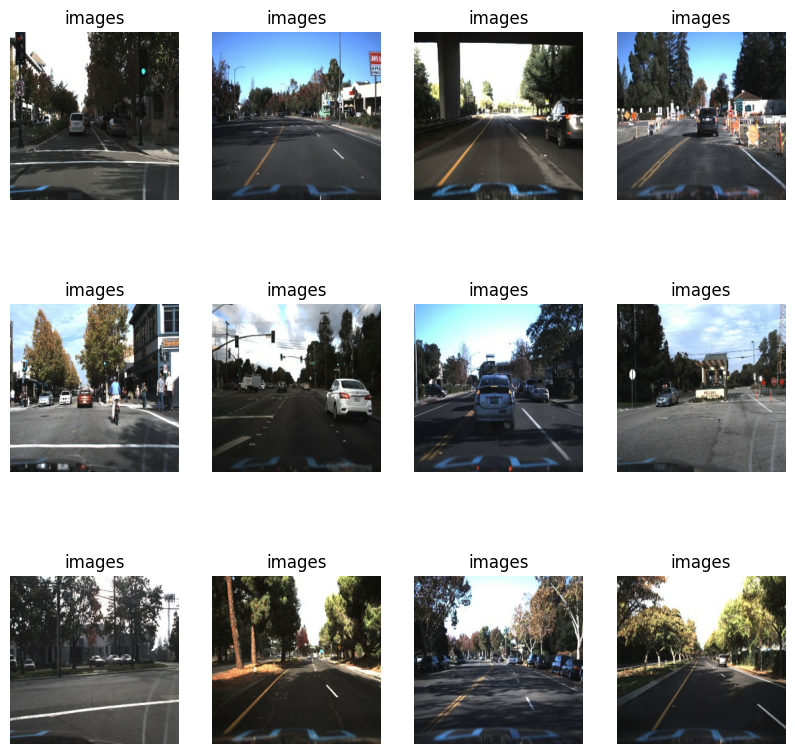

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
